Revan Mohammed Alqahmi
Revanalqahmi@gmail.com

#Case Study: House Price

The dataset represents a synthetic collection of house-related features and their corresponding prices. It contains 1000 samples, with each sample having the following features:

- Size: The size of the house
- Bedrooms: The number of bedrooms in the house
- Bathrooms: The number of bathrooms in the house
- Location: A feature representing the location of the house
- YearBuilt: The year the house was built
- RoofType: The type of roof on the house
- Price: The price of the house

## Load and Explore the Dataset

In [18]:
import pandas as pd
df = pd.read_csv('/content/house_prices_dataset.csv')
df

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
0,-0.325611,0.257199,0.007880,-0.164335,-0.240665,0.212093,-16.984913
1,-0.202193,1.277665,0.547097,-0.217681,-0.591571,1.098777,24.031693
2,-2.153731,0.975713,0.685858,0.446982,0.000756,-0.638586,57.305959
3,-0.939880,-1.304470,0.366598,-0.513867,0.669673,-1.059214,-81.049670
4,-0.570351,1.223083,0.352505,-1.820603,-0.258854,0.270057,-127.396000
...,...,...,...,...,...,...,...
995,NaN,0.689164,-0.273729,0.149598,-0.683634,0.097827,13.634300
996,-0.564079,-1.021233,0.243801,-1.280304,0.708356,0.872457,-138.161669
997,-0.981166,-1.725807,1.194109,-0.464404,-0.677565,0.462061,-94.896020
998,NaN,1.158596,0.963376,0.822060,-0.820682,1.896793,133.087712


Let's explore the dataset to better know what we're dealing with

In [19]:
# Question 1:
# Get the shape of the dataset
print("The shape of the dataset:\n", df.shape)

print("\n")

# Check the data types of the columns
print("The data types of the columns:\n", df.dtypes)


The shape of the dataset:
 (1000, 7)


The data types of the columns:
 Size         float64
Bedrooms     float64
Bathrooms    float64
Location     float64
YearBuilt    float64
RoofType     float64
Price        float64
dtype: object


## Deeper Exploration

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 2:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


# Drop rows with NaN values
df = df.dropna()

print("\n")
# Check for missing values again
print("Missing values:\n", df.isnull().sum())

Missing Values:
 Size         200
Bedrooms     100
Bathrooms      0
Location       0
YearBuilt      0
RoofType       0
Price          0
dtype: int64


Missing values:
 Size         0
Bedrooms     0
Bathrooms    0
Location     0
YearBuilt    0
RoofType     0
Price        0
dtype: int64


This function sns.pairplot() creates scatter plots for each numerical feature (Size, Bedrooms, Bathrooms, Location, YearBuilt) against the target variable (Price).

This approach creates a pair plot directly using sns.pairplot() on the entire DataFrame or a selected subset of columns. It creates pairwise scatter plots for all numerical features against each other, as well as histograms along the diagonal for the distribution of each feature. This can be useful for exploring the relationships between all numerical features in one plot.

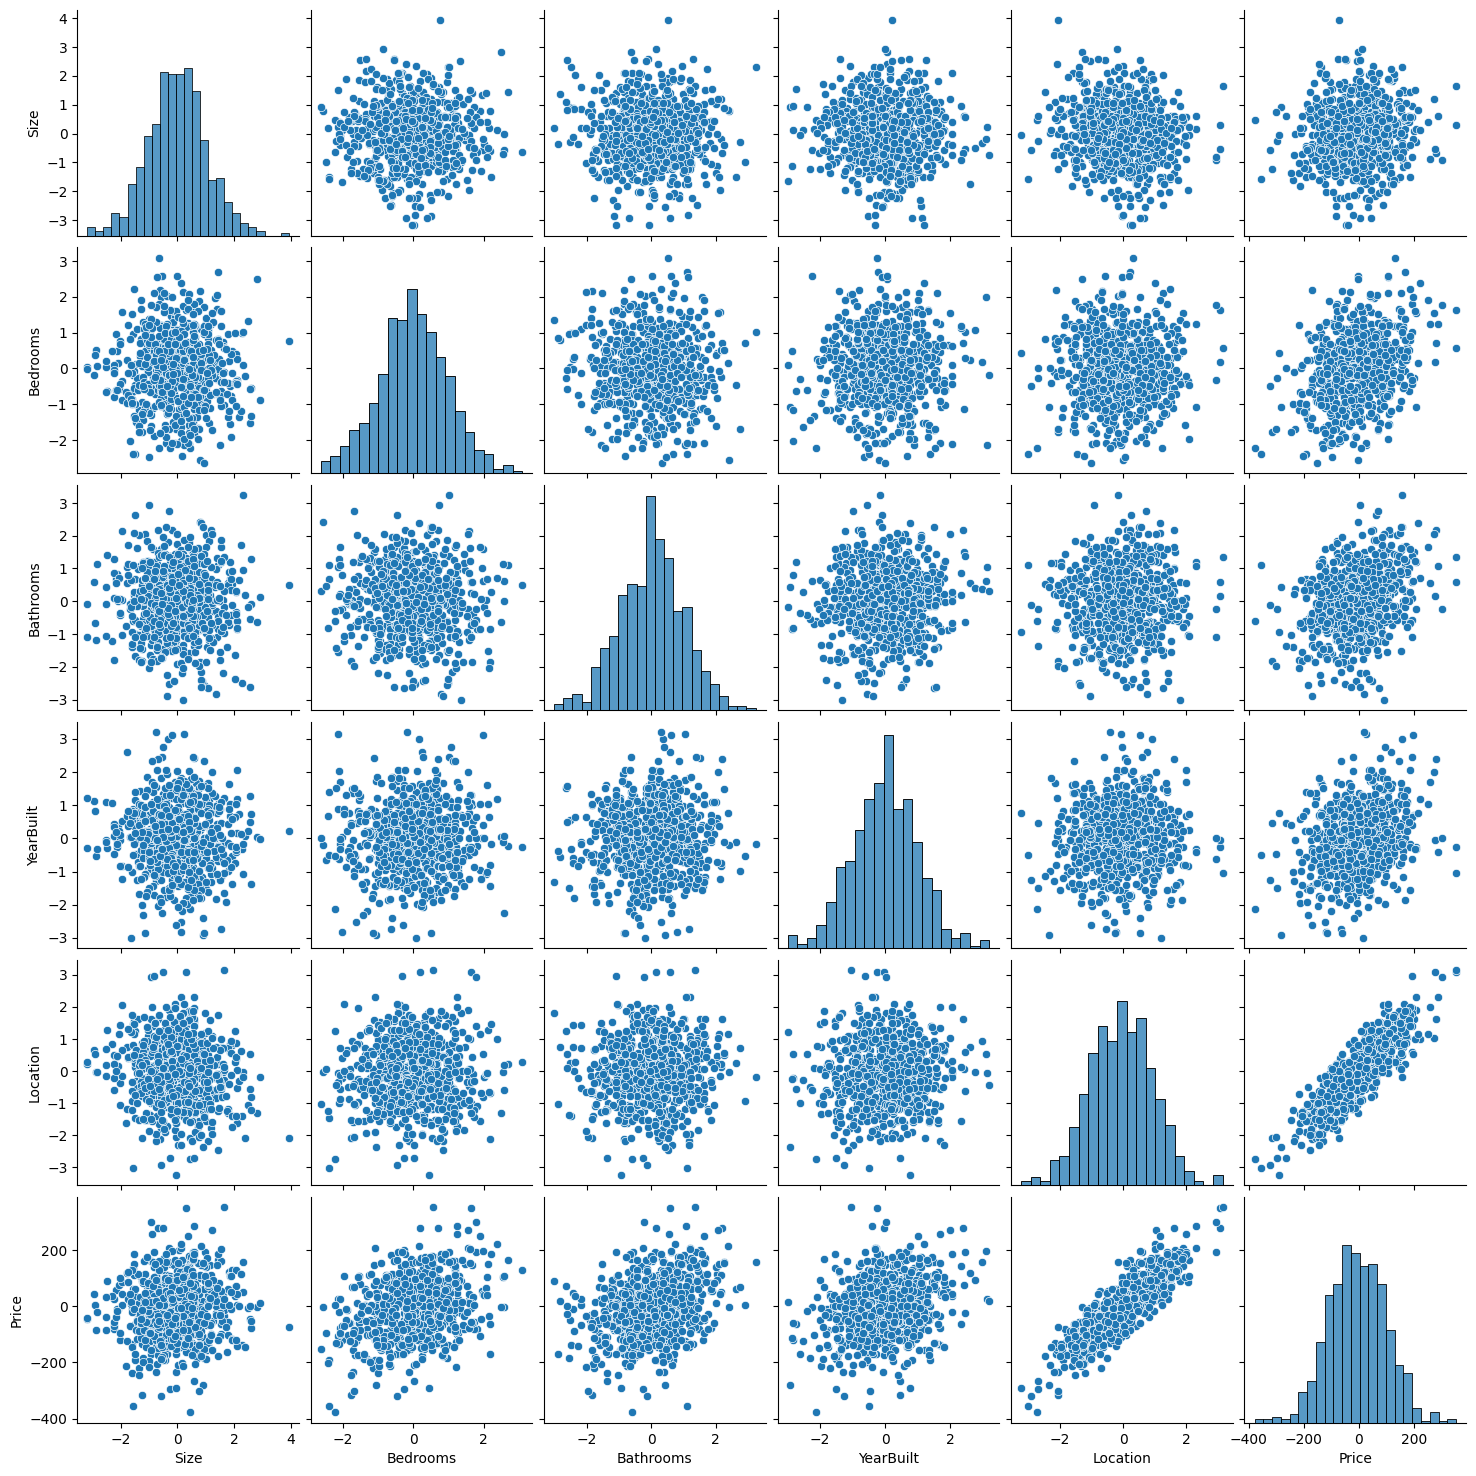

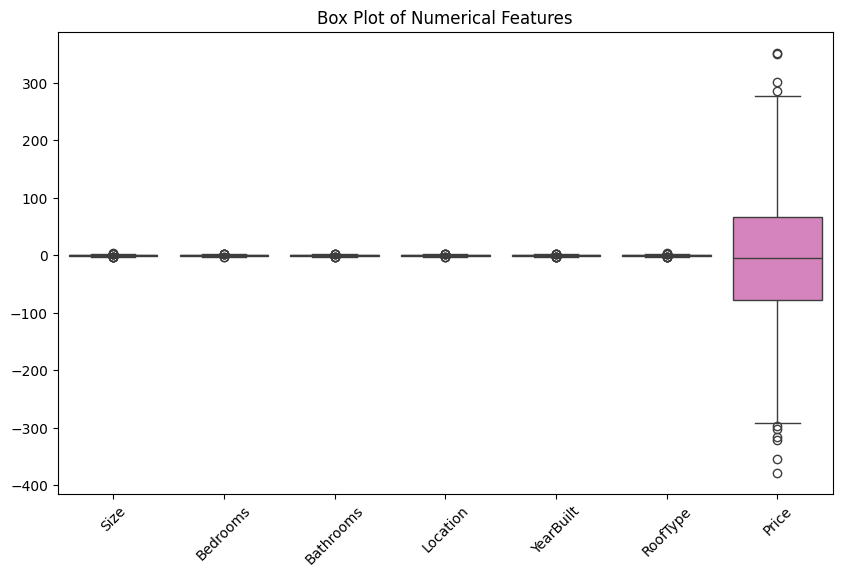

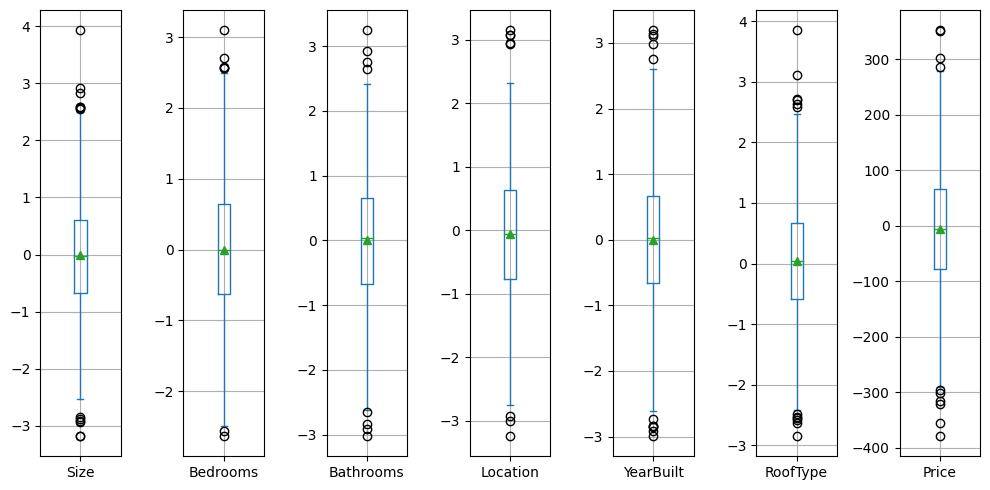

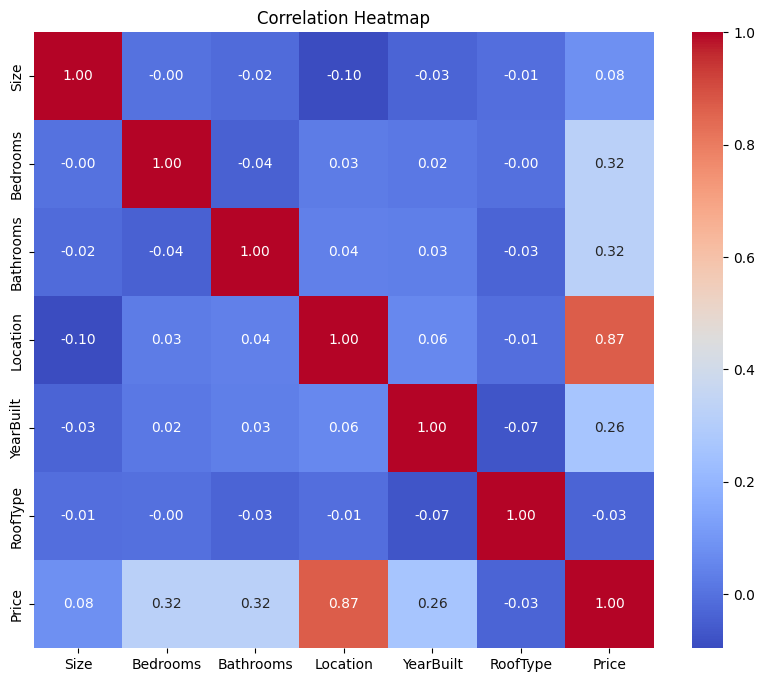

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Question 3:
# Create plots to better understand the data

# Scatter plots
numerical_features = ['Size', 'Bedrooms', 'Bathrooms', 'YearBuilt','Location', 'Price'] #way 1 to save the numerical features
# Subsetting the DataFrame
data_subset = df[numerical_features]

# Create pairplot
sns.pairplot(data_subset)

plt.show()


# Box plots
plt.figure(figsize=(10, 6))
df_num = df.select_dtypes(include=['int', 'float']) #way 2 to save the numerical features
sns.boxplot(data=df_num)

plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)

plt.show()

# Separate it because the scale is very different
ax = df.plot.box(figsize=(10, 5), showmeans=True, grid=True, subplots=True)
plt.tight_layout()
plt.show()


# Correlation Heatmap
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Predictive Modeling using Linear Regression

- Split the Data
- Train a Linear Regressor
- Evaluate it on the test set using any metric of your choice

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Question 4:
# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit a linear regression model
model.fit(X_train, y_train)


LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Question 5:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared score:", r_squared)


Mean Squared Error: 0.24566225870757094
R-squared score: 0.9999788915641026


## Predictive Modeling using Logistic Regression

To utilize the same dataset for logistic regression, you need to transform the problem into a classification task. For example, you can introduce a threshold and classify the houses as "expensive" or "affordable" based on whether their prices are above or below the threshold. You can choose the threshold based on your dataset or specific requirements.

Convert the target variable into a binary variable (0 or 1) representing the classes (e.g., 0 for affordable, 1 for expensive). Then, train a logistic regression model using the same features to classify houses as either affordable or expensive based on the chosen threshold.

In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Question 6:

# Set the median as a threshold to classify houses as "expensive" or "affordable"
threshold = df['Price'].median()

# Transform the problem into a classification task
df["Class"] = df["Price"].apply(lambda x: 1 if x >= threshold else 0)
df = df.drop("Price", axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
classifier = LogisticRegression()

# Fit a logistic regression model
classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9861111111111112
Precision: 0.9864864864864865
Recall: 0.9864864864864865
F1 score: 0.9864864864864865


<ipython-input-24-122628c72d26>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = df["Price"].apply(lambda x: 1 if x >= threshold else 0)
